<a href="https://colab.research.google.com/drive/1TPlDVlWCwfXB0lbTJLNnHCoFwIjVgoNH?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework

## Problem 1

Let $f(x) = 2\sin x - \cos{2x}$. Write a function `beauty_derivative_plot` that takes a point $x$ and plots the function $f(x)$ and its derivative $f'(x)$ in the range $x \in [-2\pi, 2\pi]$. The function should also plot the tangent line to the function at the point $x$.

Example of output for $x = -3, -2, 1.7$:

```python
beauty_derivative_plot(-3)
```
<img src="https://i.ibb.co/W4pyPfTX/tangent-line-3-0.png" width="600"/>

```python
beauty_derivative_plot(-2)
```
<img src="https://i.ibb.co/F4zDq8m0/tangent-line-2-0.png" width="600"/>

```python
beauty_derivative_plot(1.7)
```
<img src="https://i.ibb.co/TBmLXg2h/tangent-line-1-7.png" width="600"/>

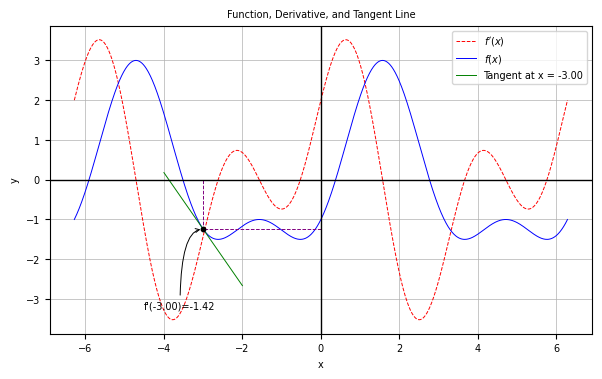

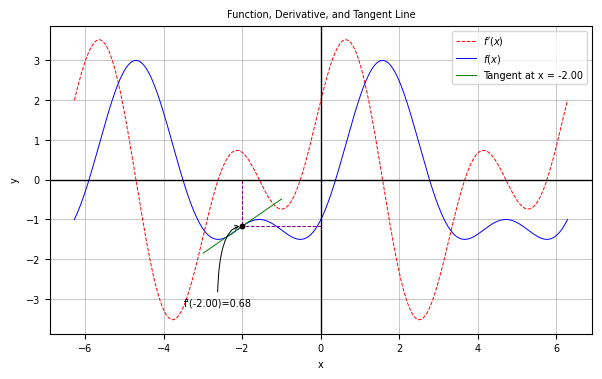

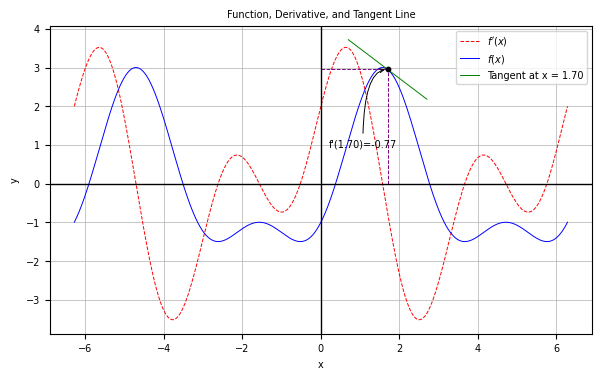

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def beauty_derivative_plot(x0):
    
    def func(x):
        return 2 * np.sin(x) - np.cos(2 * x)

    def derivative(x):
        return 2 * np.cos(x) + 2 * np.sin(2 * x)

    domain = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
    func_values = func(domain)
    deriv_values = derivative(domain)

    tangent_x = np.linspace(x0 - 1, x0 + 1, 200)
    tangent_y = func(x0) + derivative(x0) * (tangent_x - x0)

    plt.figure(figsize=(7, 4))
    plt.plot(domain, deriv_values, 'r--', linewidth=0.7, label=r"$f'(x)$")
    plt.plot(domain, func_values, 'b', linewidth=0.7, label=r"$f(x)$")
    plt.plot(tangent_x, tangent_y, 'g', linewidth=0.7, label=f'Tangent at x = {x0:.2f}')

    plt.scatter(x0, func(x0), color='black', zorder=5, s=10)
    plt.plot([x0, x0], [0, func(x0)], 'purple', linestyle='--', linewidth=0.7)
    plt.plot([0, x0], [func(x0), func(x0)], 'purple', linestyle='--', linewidth=0.7)

    plt.axhline(0, color='black', linewidth=1)
    plt.axvline(0, color='black', linewidth=1)

    plt.grid(True, linewidth=0.5)
    plt.title('Function, Derivative, and Tangent Line', fontsize=7)
    plt.xlabel('x', fontsize=7)
    plt.ylabel('y', fontsize=7)
    plt.legend(loc='upper right', fontsize=7)

    plt.annotate(f"f'({x0:.2f})={derivative(x0):.2f}",
                 xy=(x0, func(x0)),
                 xytext=(x0 - 1.5, func(x0) - 2),
                 arrowprops={'arrowstyle': '->', 'connectionstyle': 'Angle3', 'linewidth': 0.7},
                 fontsize=7)

    plt.xticks(fontsize=7)
    plt.yticks(fontsize=7)
    plt.show()



beauty_derivative_plot(-3)
beauty_derivative_plot(-2)
beauty_derivative_plot(1.7)

## Problem 2

The data in [populations.txt](https://drive.google.com/file/d/1Bq7qVzbZIOd058VobGE6iYjUcMFkbZMt/view?usp=drive_link) describes the populations of hares, lynxes and carrots in northern Canada during 20 years. Do the following exercises **without for-loops**.

- Plot the population size of each species for each year on a single graph. Add legend and axis labels to the plot.

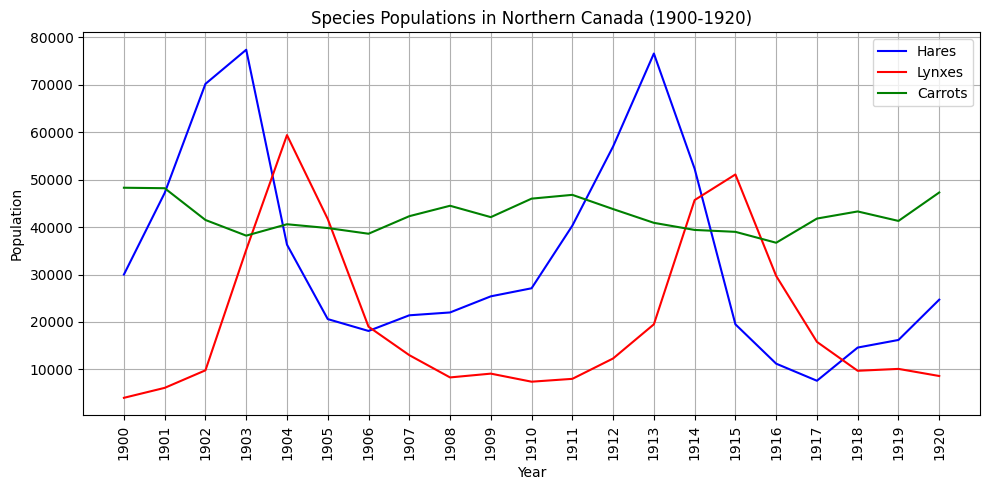

In [31]:
import matplotlib.pyplot as plt
import numpy as np


data = np.loadtxt('populations.txt')
years = data[:, 0]
hares = data[:, 1]
lynxes = data[:, 2]
carrots = data[:, 3]
plt.figure(figsize=(10, 5))
plt.plot(years, hares, label='Hares', color='blue')
plt.plot(years, lynxes, label='Lynxes', color='red')
plt.plot(years, carrots, label='Carrots', color='green')
plt.title('Species Populations in Northern Canada (1900-1920)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.xticks(range(1900, 1921, 1), rotation = 90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

- Find which year each species had the largest population. Mark these years in the plot of populations.

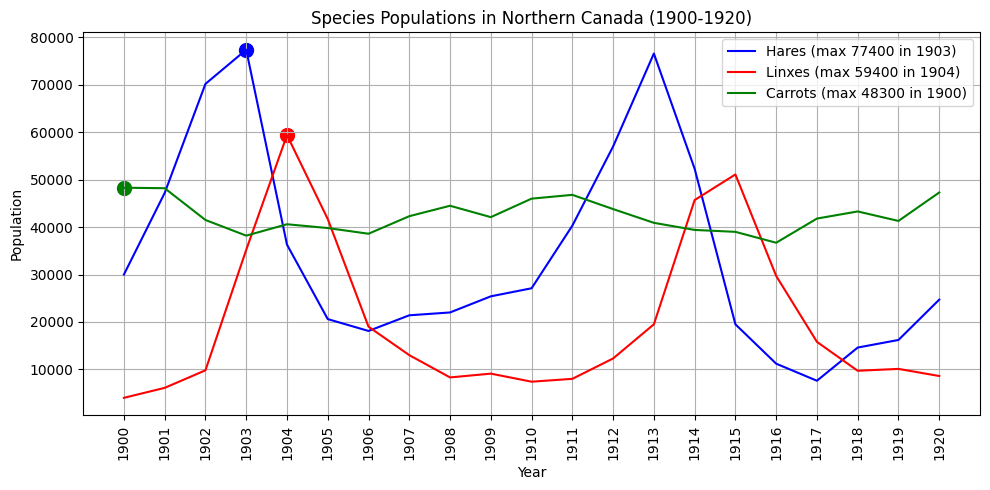

In [33]:
import matplotlib.pyplot as plt
import numpy as np

data = np.loadtxt('populations.txt')
years = data[:, 0]
hares = data[:, 1]
lynxes = data[:, 2]
carrots = data[:, 3]

max_hare_year = years[np.argmax(hares)]
max_lynx_year = years[np.argmax(lynxes)]
max_carrot_year = years[np.argmax(carrots)]

max_hare_pop = np.max(hares)
max_lynx_pop = np.max(lynxes)
max_carrot_pop = np.max(carrots)

plt.figure(figsize=(10, 5))
plt.plot(years, hares, label=f'Hares (max {int(max_hare_pop)} in {int(max_hare_year)})', color='blue')
plt.plot(years, lynxes, label=f'Linxes (max {int(max_lynx_pop)} in {int(max_lynx_year)})', color='red')
plt.plot(years, carrots, label=f'Carrots (max {int(max_carrot_pop)} in {int(max_carrot_year)})', color='green')

plt.scatter([max_hare_year], [max_hare_pop], color='blue', s=100, marker='o')
plt.scatter([max_lynx_year], [max_lynx_pop], color='red', s=100, marker='o')
plt.scatter([max_carrot_year], [max_carrot_pop], color='green', s=100, marker='o')

plt.title('Species Populations in Northern Canada (1900-1920)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.xticks(range(1900, 1921, 1), rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


- Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for each year in the period.

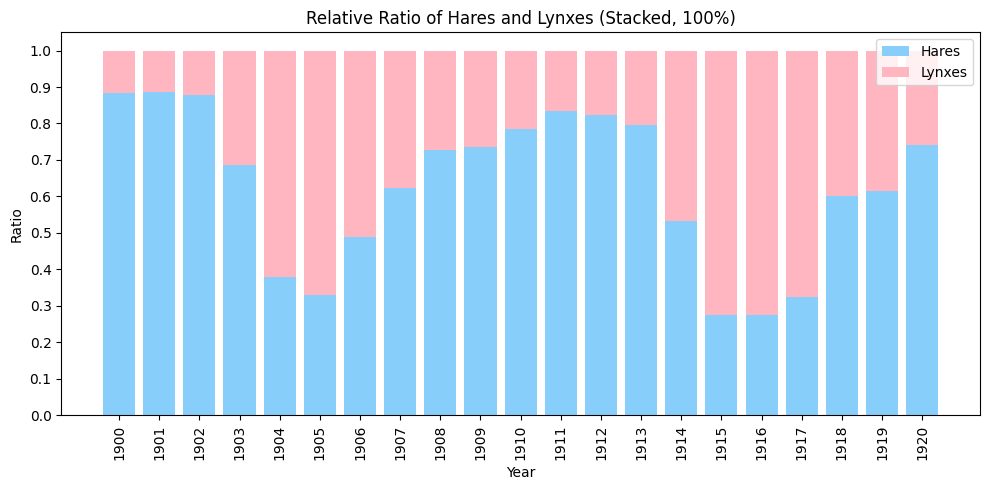

In [36]:
import matplotlib.pyplot as plt
import numpy as np

data = np.loadtxt('populations.txt')
years = data[:, 0]
hares = data[:, 1]
lynxes = data[:, 2]
carrots = data[:, 3]

max_hare_year = years[np.argmax(hares)]
max_lynx_year = years[np.argmax(lynxes)]
max_carrot_year = years[np.argmax(carrots)]

max_hare_pop = np.max(hares)
max_lynx_pop = np.max(lynxes)
max_carrot_pop = np.max(carrots)

hare_lynx_total = hares + lynxes
hare_ratio = hares / hare_lynx_total
lynx_ratio = lynxes / hare_lynx_total

plt.figure(figsize=(10, 5))
plt.bar(years, hare_ratio, label='Hares', color='#87CEFA')  # light sky blue
plt.bar(years, lynx_ratio, bottom=hare_ratio, label='Lynxes', color='#FFB6C1')  # light pink

plt.title('Relative Ratio of Hares and Lynxes (Stacked, 100%)')
plt.xlabel('Year')
plt.ylabel('Ratio')
plt.xticks(range(1900, 1921, 1), rotation=90)
plt.yticks(np.linspace(0, 1, 11))
plt.legend()
plt.tight_layout()
plt.show()


- Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Show each histogram in a separate plot. Arrange 3 plots in a row.

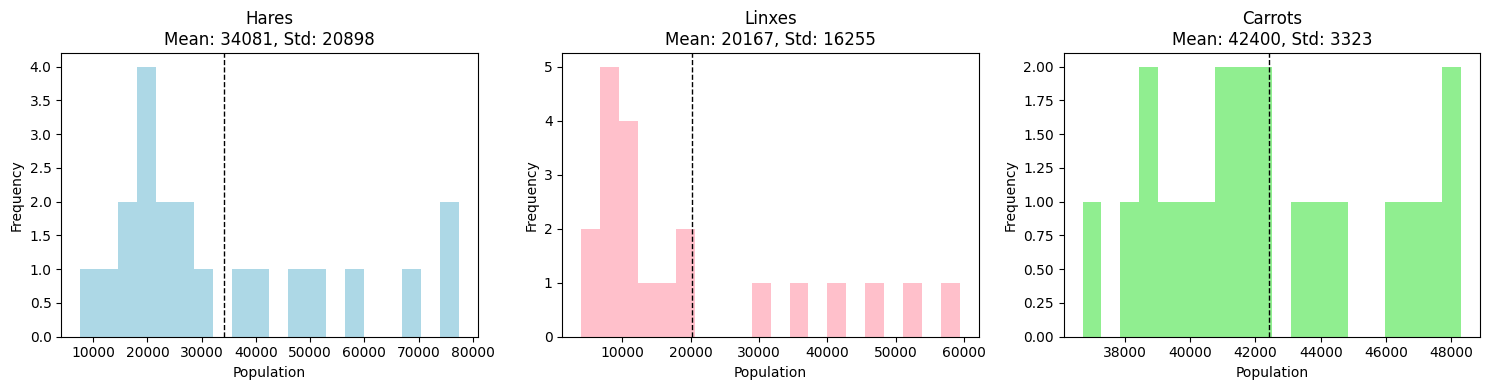

In [39]:
import matplotlib.pyplot as plt
import numpy as np

data = np.loadtxt('populations.txt')
years = data[:, 0]
hares = data[:, 1]
lynxes = data[:, 2]
carrots = data[:, 3]

hare_mean, hare_std = np.mean(hares), np.std(hares)
lynx_mean, lynx_std = np.mean(lynxes), np.std(lynxes)
carrot_mean, carrot_std = np.mean(carrots), np.std(carrots)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].hist(hares, bins=20, color='#ADD8E6')
axes[0].axvline(hare_mean, color='black', linestyle='dashed', linewidth=1)
axes[0].set_title(f'Hares\nMean: {hare_mean:.0f}, Std: {hare_std:.0f}')

axes[1].hist(lynxes, bins=20, color='#FFC0CB')
axes[1].axvline(lynx_mean, color='black', linestyle='dashed', linewidth=1)
axes[1].set_title(f'Linxes\nMean: {lynx_mean:.0f}, Std: {lynx_std:.0f}')

axes[2].hist(carrots, bins=20, color='#90EE90')
axes[2].axvline(carrot_mean, color='black', linestyle='dashed', linewidth=1)
axes[2].set_title(f'Carrots\nMean: {carrot_mean:.0f}, Std: {carrot_std:.0f}')

for ax in axes:
    ax.set_xlabel('Population')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()




- Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing the ratio of "H" and "L" values.

['H', 'H', 'H', 'H', 'L', 'L', 'L', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'L', 'L', 'L', 'H', 'H', 'H']


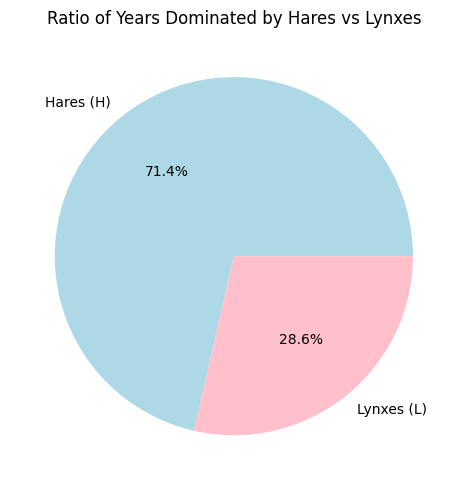

In [41]:
import matplotlib.pyplot as plt
import numpy as np

data = np.loadtxt('populations.txt')
years = data[:, 0]
hares = data[:, 1]
lynxes = data[:, 2]
carrots = data[:, 3]

labels = ['H' if h > l else 'L' for h, l in zip(hares, lynxes)]
print(labels)

h_count = labels.count('H')
l_count = labels.count('L')

plt.figure(figsize=(5, 5))
plt.pie([h_count, l_count], labels=['Hares (H)', 'Lynxes (L)'], autopct='%1.1f%%', colors=['#ADD8E6', '#FFC0CB'])
plt.title('Ratio of Years Dominated by Hares vs Lynxes')
plt.tight_layout()
plt.show()



- Plot the change in the hare population and in the lynx population for each year. Find the correlation coefficient between the both time series.

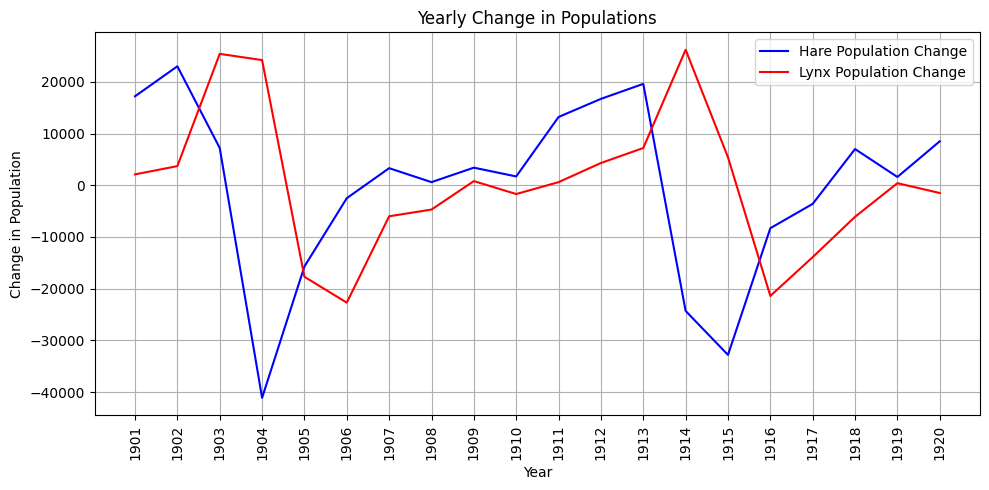

Correlation coefficient between hare and lynx population changes: -0.178


In [42]:
import matplotlib.pyplot as plt
import numpy as np

data = np.loadtxt('populations.txt')
years = data[:, 0]
hares = data[:, 1]
lynxes = data[:, 2]
carrots = data[:, 3]

hare_changes = np.diff(hares)
lynx_changes = np.diff(lynxes)
change_years = years[1:]

plt.figure(figsize=(10, 5))
plt.plot(change_years, hare_changes, label='Hare Population Change', color='blue')
plt.plot(change_years, lynx_changes, label='Lynx Population Change', color='red')
plt.title('Yearly Change in Populations')
plt.xlabel('Year')
plt.ylabel('Change in Population')
plt.xticks(range(1901, 1921), rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

correlation = np.corrcoef(hare_changes, lynx_changes)[0, 1]
print(f'Correlation coefficient between hare and lynx population changes: {correlation:.3f}')


- Using a scatter plot, show the population of hares vs lynxes by year (each point corresponds to a particular year, and the point coordinates correspond to the population of the two species in that year).

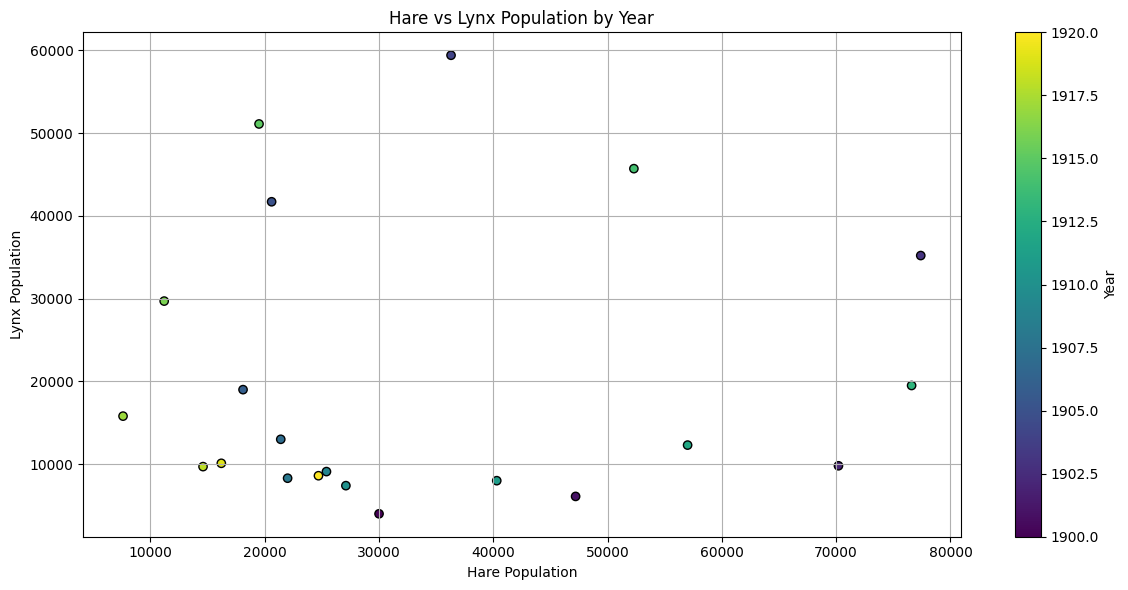

In [45]:
import matplotlib.pyplot as plt
import numpy as np

data = np.loadtxt('populations.txt')
years = data[:, 0]
hares = data[:, 1]
lynxes = data[:, 2]
carrots = data[:, 3]

plt.figure(figsize=(12, 6))
plt.scatter(hares, lynxes, c=years, cmap='viridis', edgecolor='black')
plt.title('Hare vs Lynx Population by Year')
plt.xlabel('Hare Population')
plt.ylabel('Lynx Population')
plt.grid(True)
cbar = plt.colorbar()
cbar.set_label('Year')
plt.tight_layout()
plt.show()


- Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value
with the true value and print a ratio of the error to the true value.

In [46]:
import matplotlib.pyplot as plt
import numpy as np

data = np.loadtxt('populations.txt')
years = data[:, 0]
hares = data[:, 1]
lynxes = data[:, 2]
carrots = data[:, 3]

hare_1918 = hares[years == 1918][0]
hare_1919 = hares[years == 1919][0]

estimated_1920 = hare_1919 + (hare_1919 - hare_1918)
true_1920 = hares[years == 1920][0]

error = abs(true_1920 - estimated_1920)
error_ratio = error / true_1920

print(f"Estimated hare population in 1920: {estimated_1920:.0f}")
print(f"True hare population in 1920: {true_1920:.0f}")
print(f"Relative error: {error_ratio:.2%}")


Estimated hare population in 1920: 17800
True hare population in 1920: 24700
Relative error: 27.94%
